In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [91]:
display(os.getcwd())

'C:\\Users\\asus\\OneDrive\\Documents\\Sales Forecast Project-DS'

In [92]:
os.chdir('C:\\Users\\asus\\OneDrive\\Documents\\Sales Forecast Project-DS')

In [93]:
display(os.getcwd())

'C:\\Users\\asus\\OneDrive\\Documents\\Sales Forecast Project-DS'

In [94]:
dt = pd.read_csv('Sales Project.csv')
display (dt.head())


,Item_Identifier,Extract,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [95]:
print (dt.shape)

(8523, 13)


In [96]:
display (dt.columns)


Index(['Item_Identifier', 'Extract', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [97]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.874173,0.070213,140.992782,1997.831867,2181.288914
std,4.644291,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.650000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [98]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Extract                    8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage:

None

In [99]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Extract                         3
Item_Weight                   419
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [100]:
display (dt.isnull().sum())


Item_Identifier              0
Extract                      0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [101]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)



['Item_Identifier',
 'Extract',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [102]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)

['Extract',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [103]:
for col in cat_col:
    print(col , len(dt[col].unique()))

Extract 3
Item_Fat_Content 2
Item_Type 16
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4


In [104]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)

Extract
FD    6125
NC    1599
DR     799
Name: Extract, dtype: int64

**************************************************
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Small     4806
Medium    2785
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3 

In [105]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [106]:
display (dt['Item_Weight'].isnull().sum())

0

In [107]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)

,Item_Identifier,Extract,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [108]:
Item_Weight_null['Item_Identifier'].value_counts()

Series([], Name: Item_Identifier, dtype: int64)

In [109]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [110]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [111]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])


In [112]:
result = dt['Item_Weight'].isnull().sum()
display (result)


0

In [113]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)


,Outlet_Size
Outlet_Size,
High,932
Medium,2785
Small,4806


In [114]:
result= dt['Outlet_Size'].isnull().sum()
display (result)


0

In [115]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Extract,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [116]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Series([], Name: Outlet_Type, dtype: int64)

In [117]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              929
                  Small              3716
Supermarket Type2 Medium              925
                  Small                 3
Supermarket Type3 Medium              931
                  Small                 4

In [118]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [119]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [120]:
display (dt['Outlet_Size'].isnull().sum())

0

In [121]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              929
                  Small              3716
Supermarket Type2 Medium              925
                  Small                 3
Supermarket Type3 Medium              931
                  Small                 4

In [122]:
display (sum(dt['Item_Visibility']==0))

0

In [123]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [124]:
sum(dt['Item_Visibility']==0)

0

In [125]:
display (sum(dt['Item_Visibility']==0))

0

In [126]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [127]:
display (dt['New_Item_Type'].value_counts())

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [128]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [129]:
display (dt['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [130]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [131]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [138]:

dt['Outlet_Years'] = 2023 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])


0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Outlet_Years, Length: 8523, dtype: int64


In [139]:
display (dt.head())

,Item_Identifier,Extract,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36


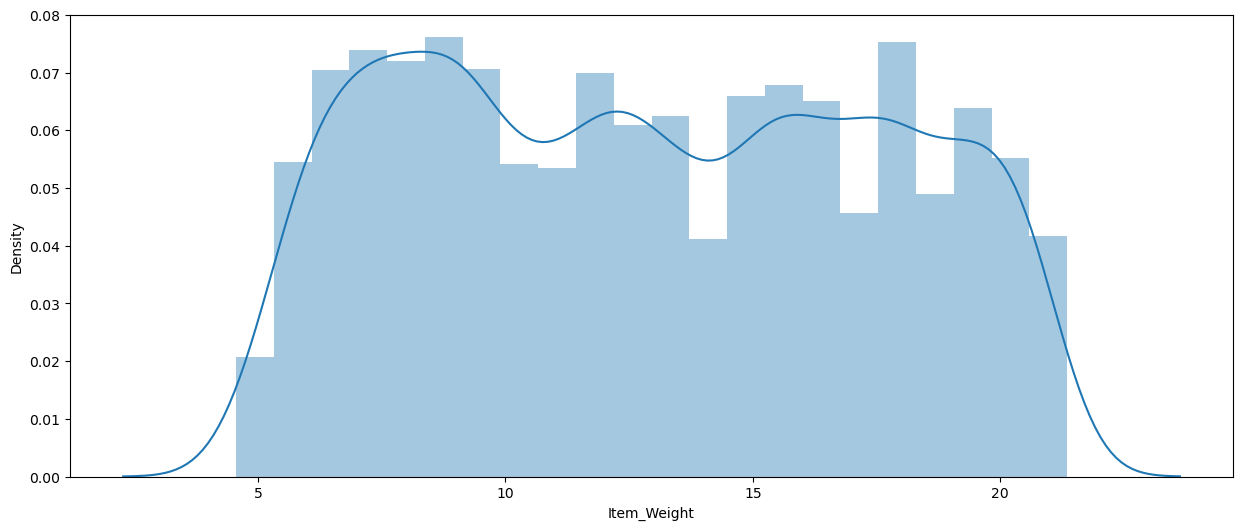

In [140]:
sns.distplot(dt['Item_Weight'])
plt.show()


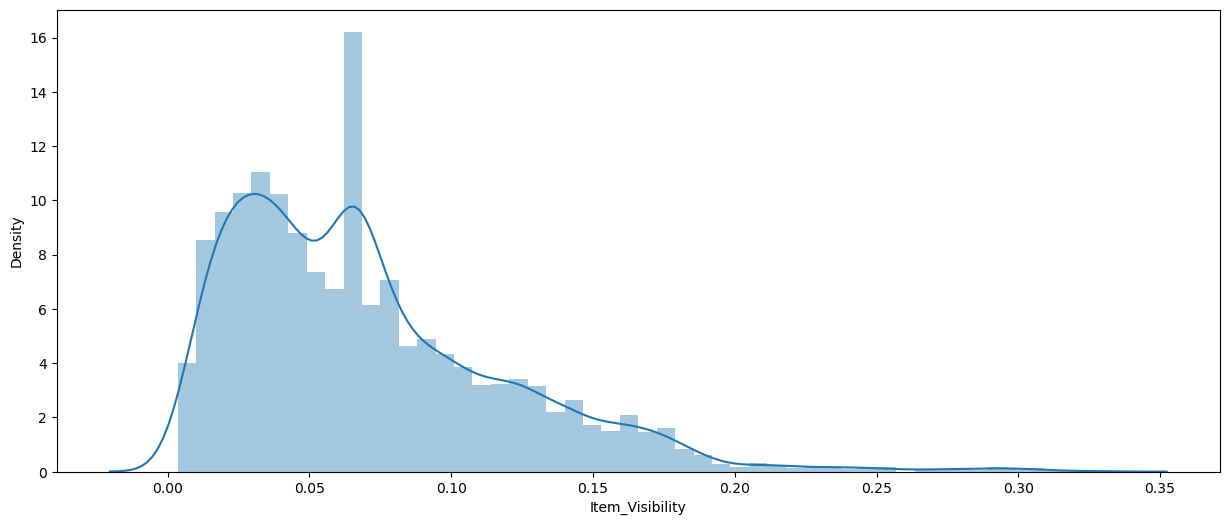

In [141]:
sns.distplot(dt['Item_Visibility'])
plt.show()

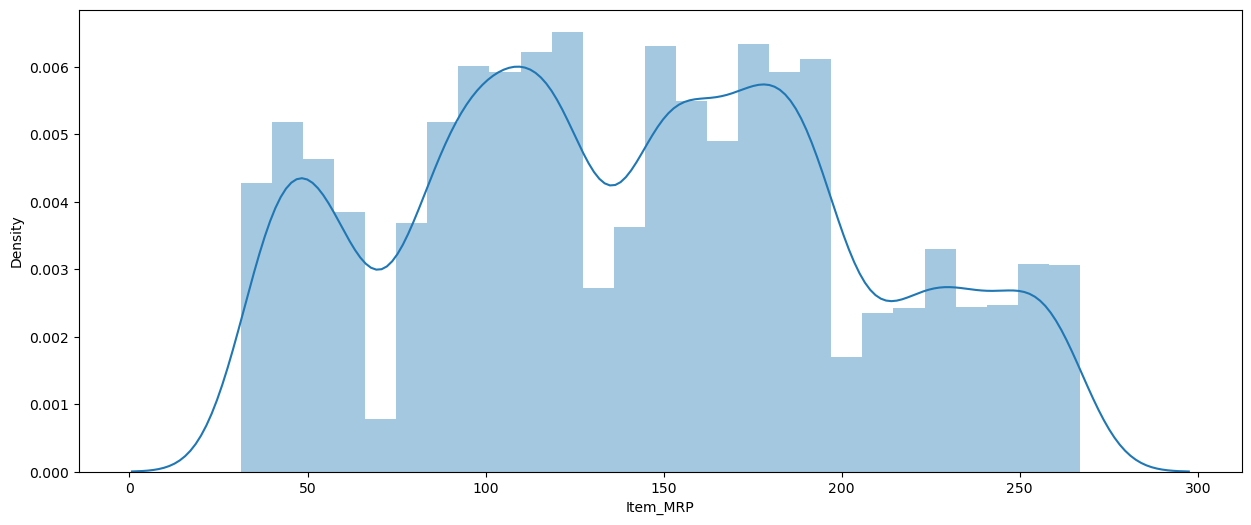

In [142]:
sns.distplot(dt['Item_MRP'])
plt.show()


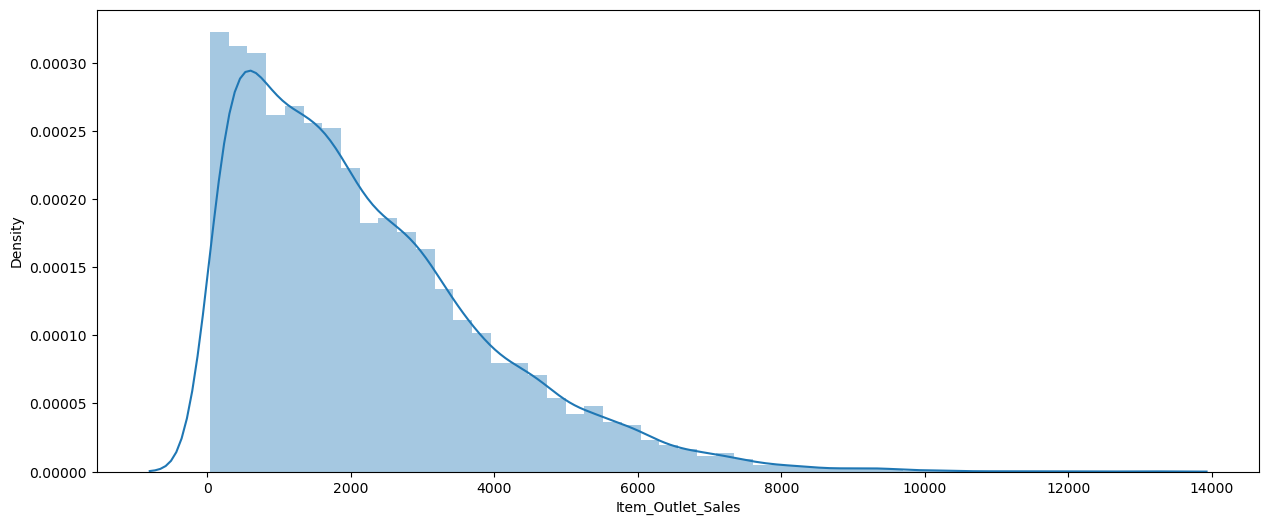

In [143]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

In [144]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

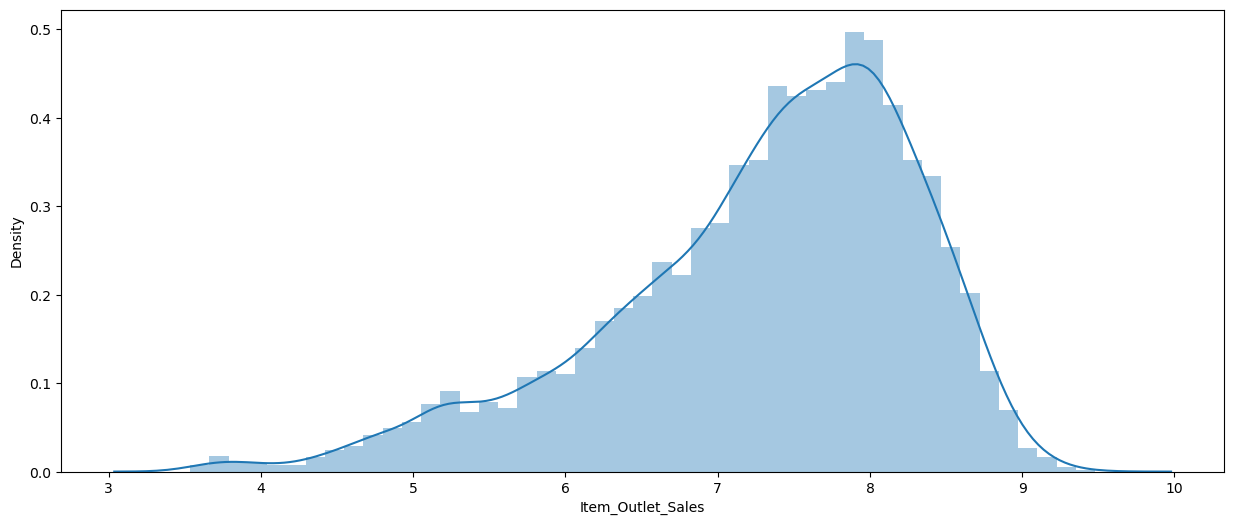

In [145]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


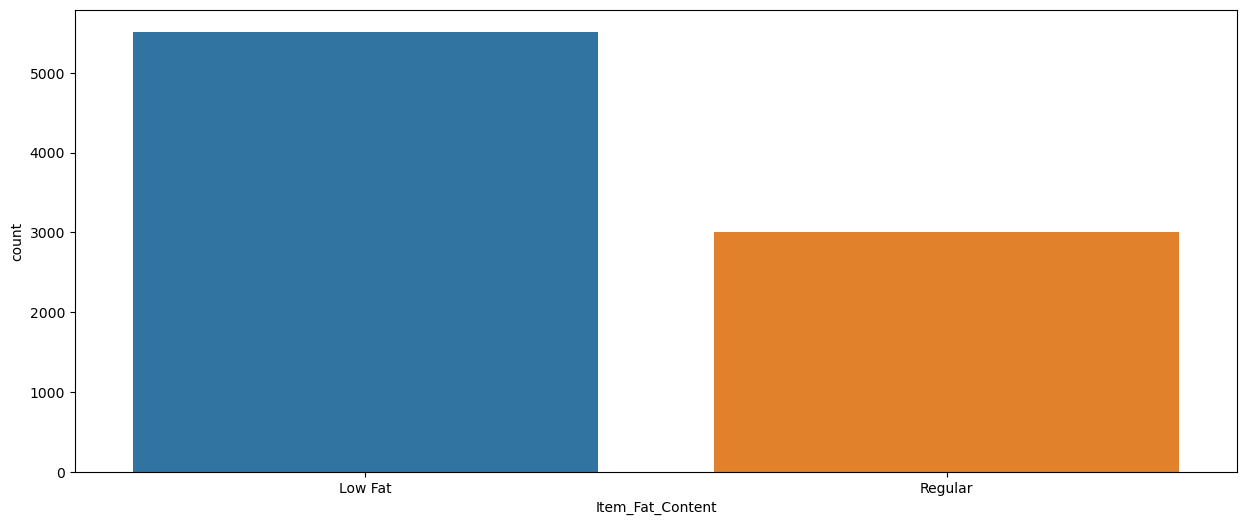

In [146]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()

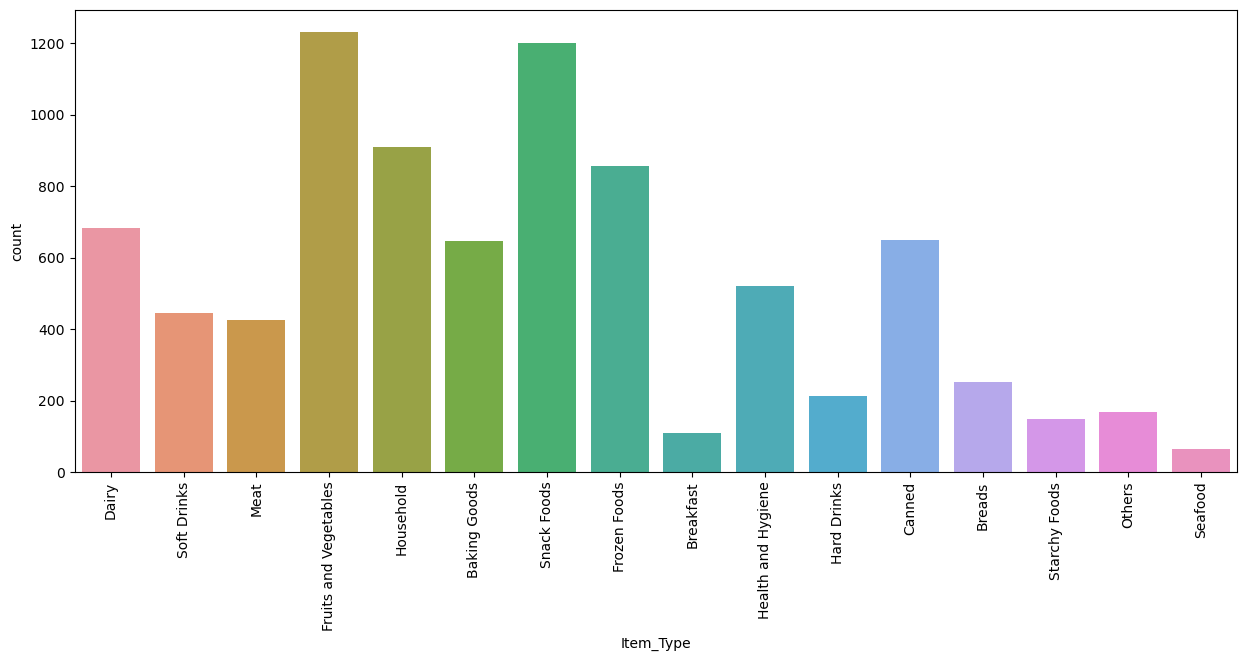

In [147]:
# l is the list of unique Item Types - This is used to display X-Label 
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

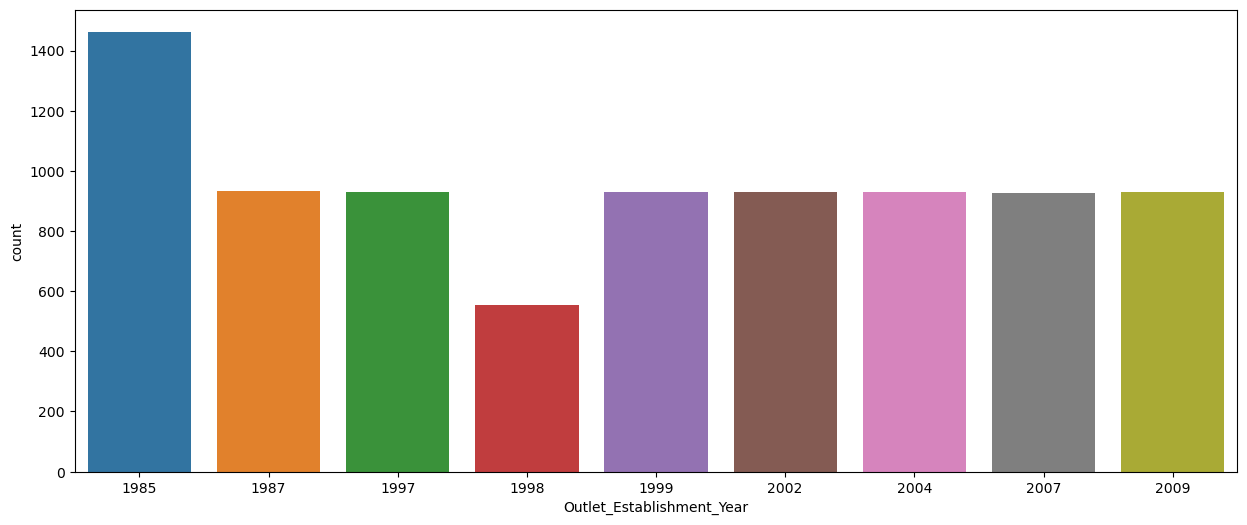

In [148]:
#Number of stores started per year  
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()


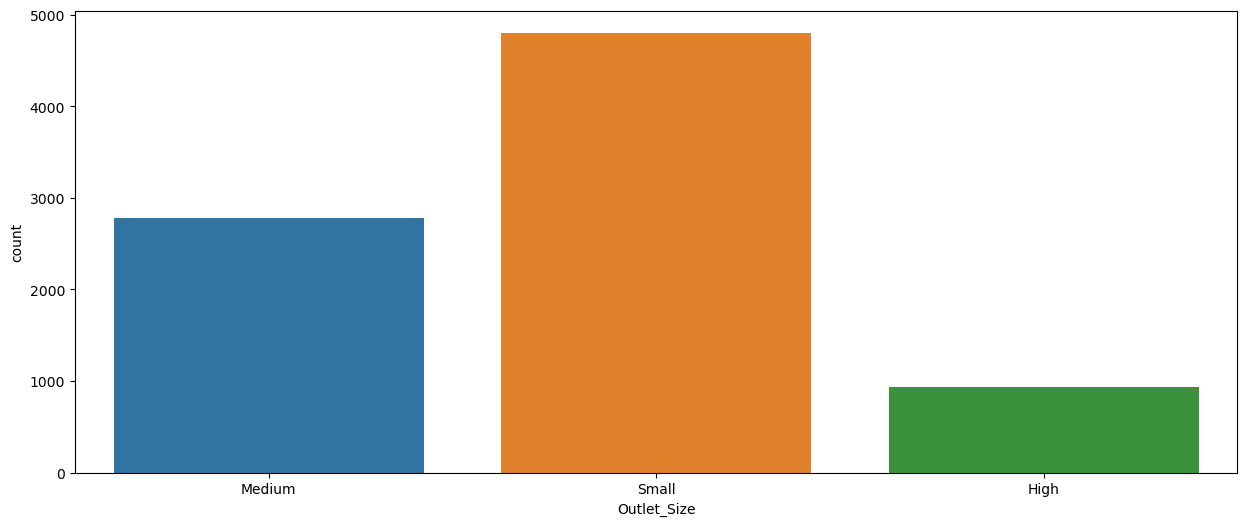

In [149]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()


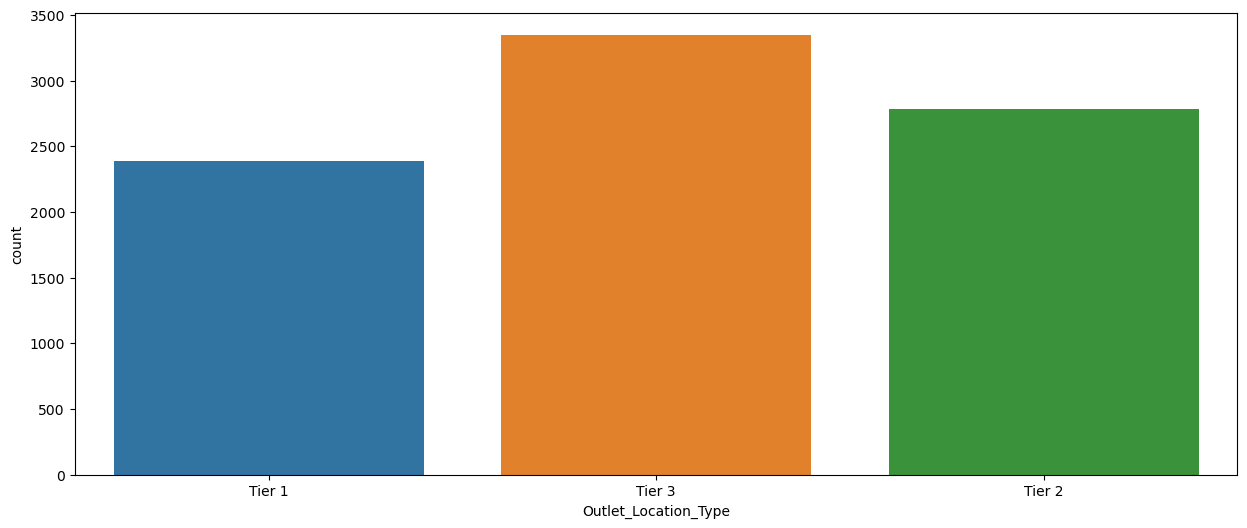

In [150]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()


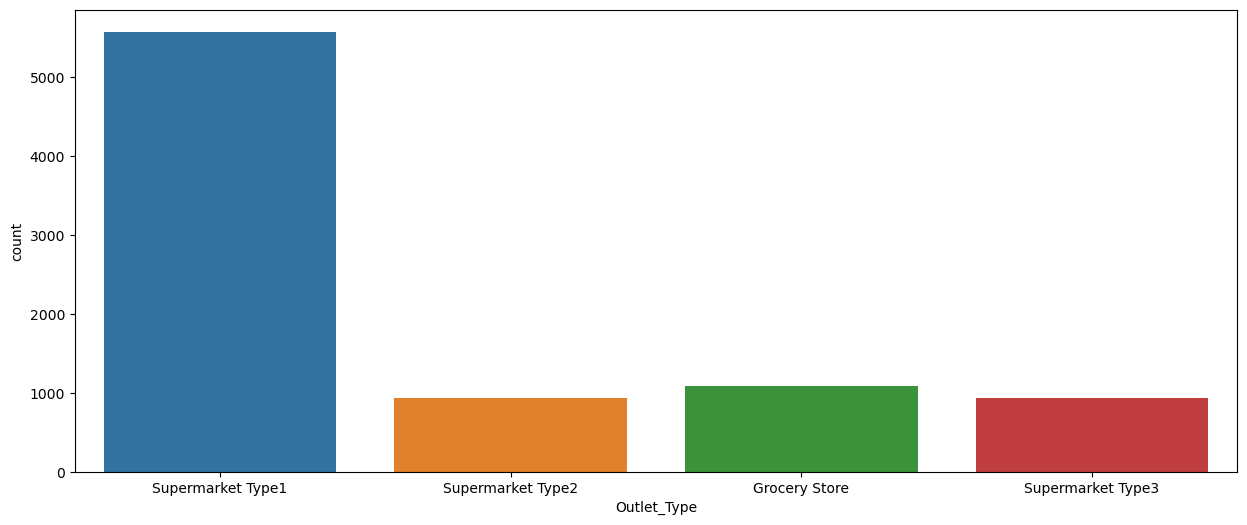

In [151]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()


In [152]:
corr = dt.corr()
display (corr)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017467,0.025943,-0.013009,0.007684,0.013009
Item_Visibility,-0.017467,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025943,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013009,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007684,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013009,0.078355,-0.005020,-1.000000,-0.077032,1.000000


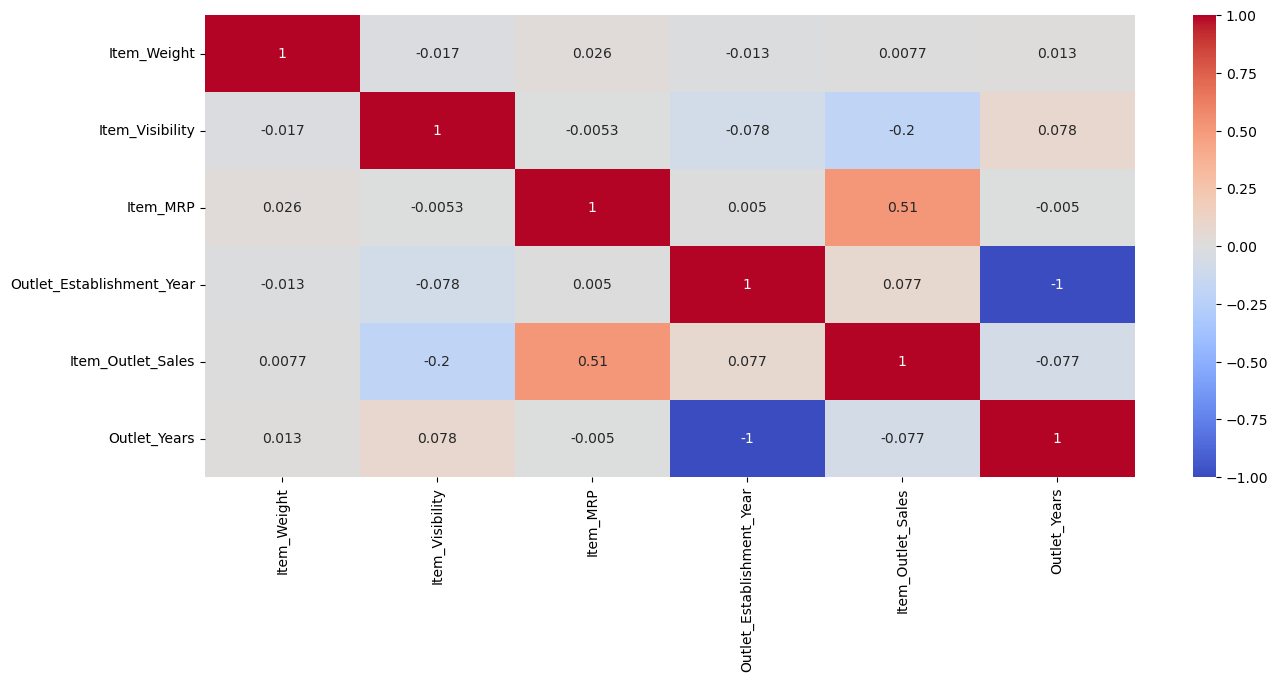

In [153]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [154]:
display (dt.head())

,Item_Identifier,Extract,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,24
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,14
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,24
3,FDX07,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,25
4,NCD19,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,36


In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [157]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())   


,Item_Identifier,Extract,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,FD,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,24,9
1,DRC01,DR,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,14,3
2,FDN15,FD,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,24,9
3,FDX07,FD,19.20,1,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,25,0
4,NCD19,NC,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,36,1


In [158]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
display (dt.head())

,Item_Identifier,Extract,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,FD,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,24,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,DR,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,14,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,FD,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,24,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,FD,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,25,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,NC,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,36,...,0,0,1,0,1,0,0,0,0,1


In [159]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
X.head()

,Extract,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FD,9.30,0.016047,4,249.8092,24,9,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,DR,5.92,0.019278,14,48.2692,14,3,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,FD,17.50,0.016760,10,141.6180,24,9,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,FD,19.20,0.066132,6,182.0950,25,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,NC,8.93,0.066132,9,53.8614,36,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [160]:
y = dt['Item_Outlet_Sales']
y.head()


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64